# ANN practical example churn dataset -Krish Naik deeplearning series youtube

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.18.0'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/Churn_Modelling.xls')


In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X=dataset.iloc[:,3:13]
Y=dataset.iloc[:,13]

In [ ]:
#Feature Engineering

geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


**Splitting the dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

#sequential is for forward and backward propogation
#dense is to create nodes, input layer, o/p layer, hiddden layers
#LeakyReLU,PReLU,ELU,ReLU is activation functions
#dropout is for

In [ ]:
classifier=Sequential()

In [ ]:
from operator import add
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#model_history=classifier.fit(X_train,Y_train,batch_size=10,epochs=50,validation_data=(X_test,Y_test))

In [ ]:
def plot_loss(model_history):
  """Plots the training and validation loss curves."""

  training_loss = model_history.history['loss']
  validation_loss = model_history.history['val_loss']

  epochs = range(1, len(training_loss) + 1)

  plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
  plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')

  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

#plot_loss(model_history)

**Early Stopping** is the shizz to not waste compute

In [ ]:
tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [ ]:
#re-executing model after defining early fit
model_history=classifier.fit(X_train,Y_train,batch_size=10,epochs=50,validation_split=0.3,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=20)])

Epoch 1/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7430 - loss: 0.5940 - val_accuracy: 0.7962 - val_loss: 0.4623
Epoch 2/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7933 - loss: 0.4497 - val_accuracy: 0.8029 - val_loss: 0.4327
Epoch 3/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8273 - loss: 0.4092 - val_accuracy: 0.8158 - val_loss: 0.4103
Epoch 4/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8390 - loss: 0.3822 - val_accuracy: 0.8392 - val_loss: 0.3898
Epoch 5/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8596 - loss: 0.3508 - val_accuracy: 0.8504 - val_loss: 0.3777
Epoch 6/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8532 - loss: 0.3483 - val_accuracy: 0.8492 - val_loss: 0.3750
Epoch 7/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8618 - loss: 0.3415 - val_accuracy: 0.8454 - val_loss: 0.3706
Epoch 8/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8631 - loss: 0.3305 - val_accuracy: 0.

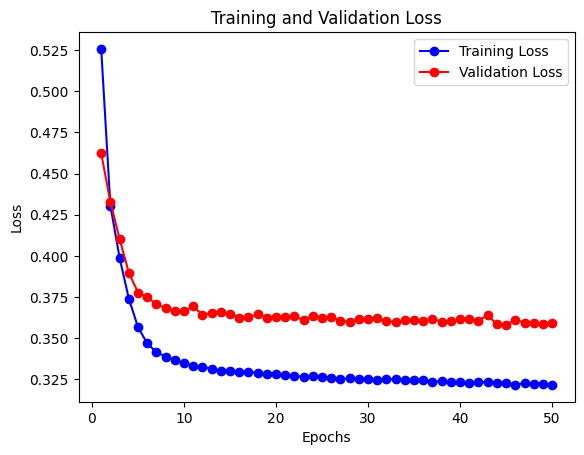

In [ ]:
plot_loss(model_history)

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
cm

array([[1516,   79],
       [ 209,  196]])

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test,y_pred)
score

0.856

In [ ]:
classifier.get_weights()

[array([[ 4.74076420e-01, -1.06505170e-01,  1.53262079e-01,
          8.42894707e-03,  1.26988977e-01, -2.07462728e-01,
          8.81669745e-02,  1.51722655e-01,  1.06600232e-01,
         -9.22872871e-02, -3.73518825e-01],
        [ 4.85751517e-02,  2.79136181e-01,  3.54529828e-01,
          3.88470978e-01,  3.33869129e-01, -7.69448504e-02,
         -9.11616266e-01,  5.28740168e-01, -3.87970448e-01,
          1.05905950e+00, -2.06239775e-01],
        [-4.12750661e-01,  3.01974148e-01,  3.09720576e-01,
         -6.50339723e-02, -7.05284923e-02, -9.05811175e-05,
         -1.70591418e-02, -5.09705782e-01, -8.49151984e-03,
         -8.49675313e-02, -3.15775365e-01],
        [ 2.53435820e-01, -2.73341127e-02, -2.50823528e-01,
         -1.73266977e-01,  4.91713047e-01, -5.68872929e-01,
         -3.26678008e-01, -4.71190929e-01,  6.00037098e-01,
          2.02257097e-01,  3.00580412e-01],
        [-2.91670710e-02,  8.28964055e-01,  4.11282293e-02,
         -1.33071196e+00,  1.14654183e+00, -